In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [33]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [34]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    error = 1.
    it = 0
    while error >= precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))
        except ZeroDivisionError:
            print('Zero Division')
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [35]:
def GetRoots(f,df,x,tolerancia = 10):
    Roots = np.array([])
    for i in x:
        root = GetNewton(f,df,i)
        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            if croot not in Roots:
                Roots = np.append(Roots, croot)
    Roots.sort()
    return Roots

In [36]:
def GetLaguerre(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return sym.expand(poly,x)

In [37]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [38]:
def GetAllRootsGLag (n):
    xn = np.linspace(0,(n)+((n-1)*np.sqrt(n)),400)
    
    Laguerre = GetLaguerre(n,x)
    DLaguerre = GetDLaguerre(n,x)
        
    poly = sym.lambdify([x],Laguerre,'numpy')
    Dpoly = sym.lambdify([x],DLaguerre,'numpy')
    
    Roots = GetRoots(poly,Dpoly,xn)
    
    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
        
    return Roots

In [39]:
def GetWeightsGLag(n):
    Roots = GetAllRootsGLag(n)
    Laguerre = GetLaguerre(n+1,x)
    poly = sym.lambdify([x],Laguerre,'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots)**2))
    return Weights

In [81]:
n = 3
zeros, weights = np.polynomial.laguerre.laggauss(n)

f = lambda x: (x**3)/(np.exp(x)-1)
Ic = np.sum(f(zeros)*weights)
Ic

0.481130171540025

In [77]:
Ie = (np.pi**4) / 15
Ie

6.493939402266828

In [78]:
def Error_Relativo(n):
    zeros, weights = np.polynomial.laguerre.laggauss(n)
    return np.sum(f(zeros)*weights)/Ie

In [79]:
ErrorR = np.array([])
n = np.linspace(1, 10, 10)
for i in range(1, 11):
    ErrorR = np.append(ErrorR, Error_Relativo(i))

Text(0, 0.5, 'Error relativo')

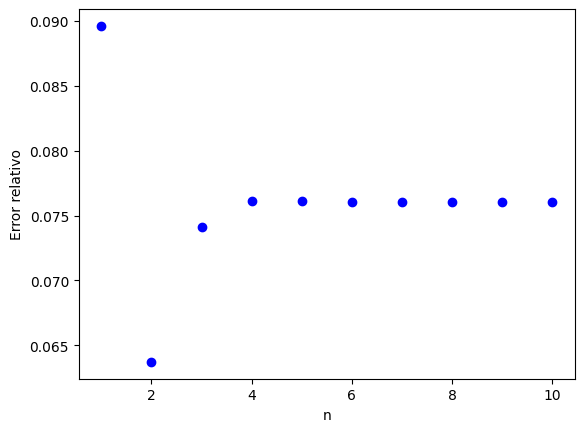

In [80]:
plt.scatter(n, ErrorR, color = 'b')
plt.xlabel('n')
plt.ylabel('Error relativo')